In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("hepatotoxicity_ALT_KlekFP_ready_set_after_conversion.csv", header=0, index_col=False)

In [71]:
df.head()

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,32.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,44.10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Columns: 4861 entries, ALT to KRFP4860
dtypes: float64(4861)
memory usage: 3.6 MB


In [73]:
df.describe()

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
count,98.000000,98.000000,98.000000,98.0,98.0,98.0,98.0,98.0,98.0,98.0,...,98.0,98.000000,98.0,98.0,98.0,98.000000,98.0,98.0,98.0,98.0
mean,47.119898,0.693878,0.418367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.051020,0.0,0.0,0.0,0.051020,0.0,0.0,0.0,0.0
std,45.294039,0.463251,0.495827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.221171,0.0,0.0,0.0,0.221171,0.0,0.0,0.0,0.0
min,1.510000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,29.775000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,36.300000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,49.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,273.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0


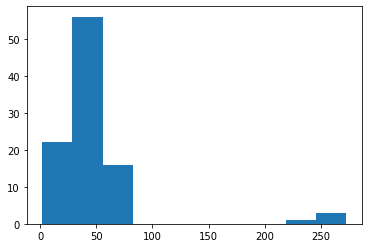

In [74]:
plt.hist(df['ALT'],bins=10)
plt.show()

In [75]:
columns = list(dataframe.columns.values)
columns.remove('ALT')

X = dataframe[columns].values
y = dataframe['ALT'].values

In [76]:
print(y)

[ 32.6   37.2    2.92   3.16  44.1   43.21  36.    22.8   27.1   35.9
  45.3   28.1   40.    80.   273.    28.    38.6  247.5  261.    57.
  26.4   25.    31.    49.    32.    28.    45.    34.    34.    43.
  41.    68.    40.6   61.14  30.     2.27   1.51   1.89  66.6   32.8
  60.    32.    61.    44.   220.    22.7   26.    49.    31.4   40.
  20.    25.    64.    49.    74.9   33.    34.4   36.7   33.4   55.7
  37.8   44.2   21.6   36.6   35.1   31.    36.    50.    29.    57.
  35.    49.    64.    41.9   43.2   39.3   25.    30.9   30.    20.
  45.3   29.7   35.5   23.3   64.    29.    17.    49.    20.    64.
  64.    79.4   33.7   38.3   32.    53.55  34.5   60.  ]


In [77]:
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [78]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_valid.shape)

(78, 4860)
(20, 4860)


In [79]:
models=[SGDRegressor(), SVR(), LinearRegression(), Lasso()]
params=[
    {'alpha' : [0.001, 0.0001, 0.00001],'learning_rate' : ['constant','optimal','invscaling']},
    {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
    {},
    {'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]}
]

In [80]:
results=[]
for model, grid_params in zip(models, params):
    kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=666)
    grid_search=GridSearchCV(estimator=model,param_grid=grid_params,scoring='neg_mean_squared_error',cv=kfold)
    grid_fit=grid_search.fit(X_train, y_train)
    results.append((grid_fit.best_estimator_, grid_fit.best_params_, grid_fit.best_score_*(-1)))

In [81]:
pd.DataFrame(results, columns=['Model', 'Params','MSE'])

,Model,Params,MSE
0,SGDRegressor(),"{'alpha': 0.0001, 'learning_rate': 'invscaling'}",1.485858e+03
1,"SVR(C=10, coef0=0.5, degree=8, kernel='poly')","{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",1.274105e+03
2,LinearRegression(),{},8.461377e+27
3,Lasso(alpha=0.1),{'alpha': 0.1},1.319843e+03


In [82]:
best_params=results[1][1]
print(best_params)

{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly'}


In [83]:
model=SVR(C=10, coef0=10, degree=3, gamma='auto', kernel='poly')
model.fit(X_train, y_train)

Y_pred=model.predict(X_valid)

mse=mean_squared_error(y_valid, Y_pred)
r2=r2_score(y_valid, Y_pred)
mae=mean_absolute_error(y_valid, Y_pred)

In [84]:
print("MSE=", mse)
print("MAE=", mae)
print("R2=", r2)

MSE= 238.02133955365747
MAE= 12.572814162744393
R2= -0.10785894631730408
